<a href="https://colab.research.google.com/github/RKS8347/Ml-projects/blob/main/first/Employee_Attrition_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

In [ ]:
train_data=pd.read_csv('/content/train_dataset.csv')
test_data=pd.read_csv('/content/test_dataset.csv')
train_data_salaries=pd.read_csv('/content/train_salaries.csv')

In [ ]:
train_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [ ]:
# pd.merge for merging  train data and train salaries data on job id column
train_data= pd.merge(train_data,train_data_salaries,on= 'jobId')
train_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


In [ ]:
#salaries less that 30 can be removed as such a such salary per month is not expected
train_data = train_data[train_data['salary']>30]

# **Basic EDA**

In [ ]:
# get all features name
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


In [ ]:
test_data.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,12.002104,49.526414
std,7.213179,28.889713
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [ ]:
print('train data length:',len(train_data))
print('test data length:',len(test_data))


train data length: 997548
test data length: 1000000


# **Get unique Values**

In [ ]:
# get how many unique value are in train_dataset
for x in train_data.columns:
  print(x,':',len(train_data[x].unique()))


jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [ ]:
for x in test_data.columns:
  print(x,':',len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


## **Counting the null values**

In [ ]:
train_data.isnull().sum()

,0
jobId,0
companyId,0
jobType,0
degree,0
major,0
industry,0
yearsExperience,0
milesFromMetropolis,0
salary,0


In [ ]:
test_data.isnull().sum()

,0
jobId,0
companyId,0
jobType,0
degree,0
major,0
industry,0
yearsExperience,0
milesFromMetropolis,0


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


In [ ]:
# droping 2 columns as there is lots of unique values
train_data = train_data.drop(['jobId', 'companyId'], axis=1)
train_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [ ]:
test_data = test_data.drop(['jobId', 'companyId'], axis=1)
test_data.head()

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


## **Check For categoreical columns in the dataset.**

In [ ]:
categorical_list=[]
var_list=[]

# Looping on whole dataset for getting list of categorical data column name
for x in train_data.columns:
  if train_data[x].dtype=='object':
    categorical_list.append(x)
  elif train_data[x].dtype=='int64':
    var_list.append(x)
  elif train_data[x].dtype=='float64':
    var_list.append(x)

In [ ]:
# Calculate the correlation matrix only for numeric columns
corr = train_data.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.00,0.00,0.37
milesFromMetropolis,0.00,1.00,-0.29
salary,0.37,-0.29,1.00


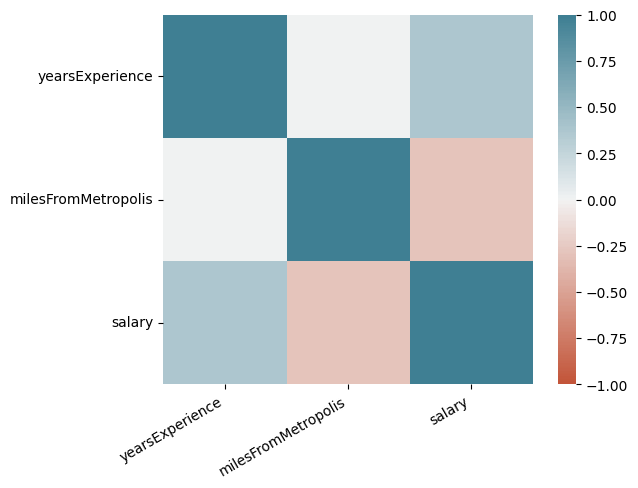

In [ ]:
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,
               cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right');

## **Chi-square Test**
# used for testing relationships between categorical variable

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2

def perform_chi_square_test(var1, var2):
    # Contingency table
    contingency_table = pd.crosstab(train_data[var1], train_data[var2])

    # Chi-square test
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print(f"Chi-Square Statistic: {chi2_stat}")
    print(f"Degrees of Freedom: {dof}")
    print(f"p-value: {p}")

    # Significant level 5%A
    alpha=0.05
    print('significant_level :',alpha)

    # Critical value
    alpha = 0.05
    critical_value = chi2.ppf(q=1-alpha, df=dof)
    print(f"Critical Value: {critical_value}")

    # Conclusion based on critical value
    if chi2_stat >= critical_value:
        print("Reject H0: There is a relationship between the two categorical variables.")
    else:
        print("Retain H0: There is no relationship between the two categorical variables.")

    # Conclusion based on p-value
    if p <= alpha:
        print("Reject H0: There is a relationship between the two categorical variables.")
    else:
        print("Retain H0: There is no relationship between the two categorical variables.")


In [ ]:
# looping on categorical data list and use function for performing chi-square test on columns
for x in categorical_list:
  for i in categorical_list:
    if i != x:
      print('chi square test on:',x,' ',i,'\n')
      perform_chi_square_test(x,i)
      print('-----------------------------------------------------\n')

chi square test on: jobType   degree 

Chi-Square Statistic: 155995.28114527254
Degrees of Freedom: 28
p-value: 0.0
significant_level : 0.05
Critical Value: 41.33713815142739
Reject H0: There is a relationship between the two categorical variables.
Reject H0: There is a relationship between the two categorical variables.
-----------------------------------------------------

chi square test on: jobType   major 

Chi-Square Statistic: 123366.84572121144
Degrees of Freedom: 56
p-value: 0.0
significant_level : 0.05
Critical Value: 74.46832415930936
Reject H0: There is a relationship between the two categorical variables.
Reject H0: There is a relationship between the two categorical variables.
-----------------------------------------------------

chi square test on: jobType   industry 

Chi-Square Statistic: 147.3610322051241
Degrees of Freedom: 42
p-value: 1.2489927445239287e-13
significant_level : 0.05
Critical Value: 58.12403768086803
Reject H0: There is a relationship between the two

# Scatter Plot
# used to observe and show relationships between two numerical variables

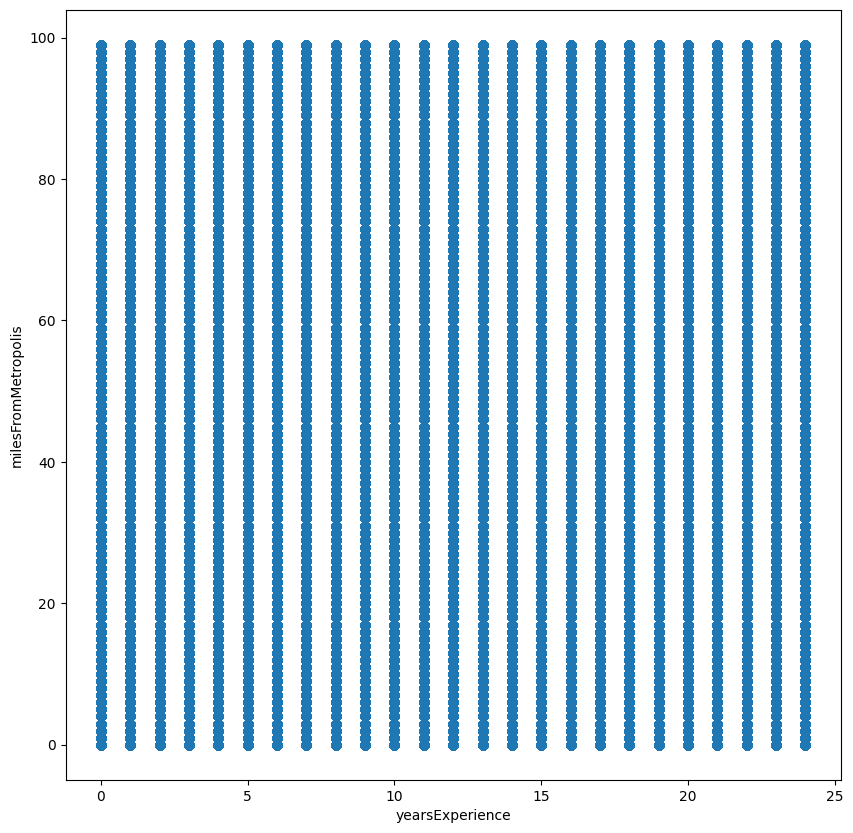

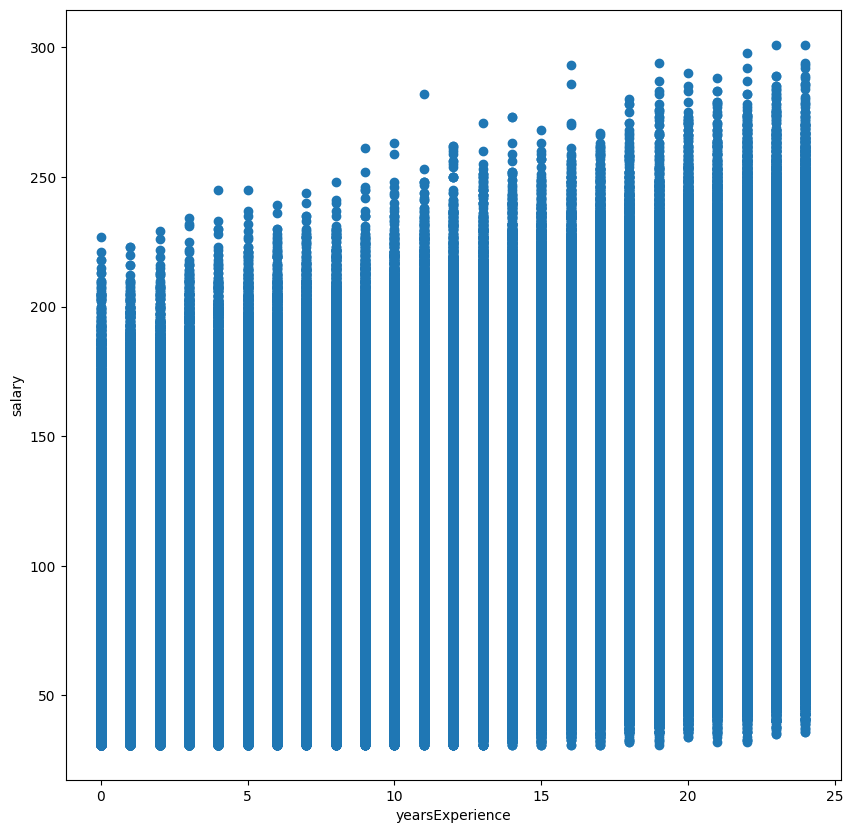

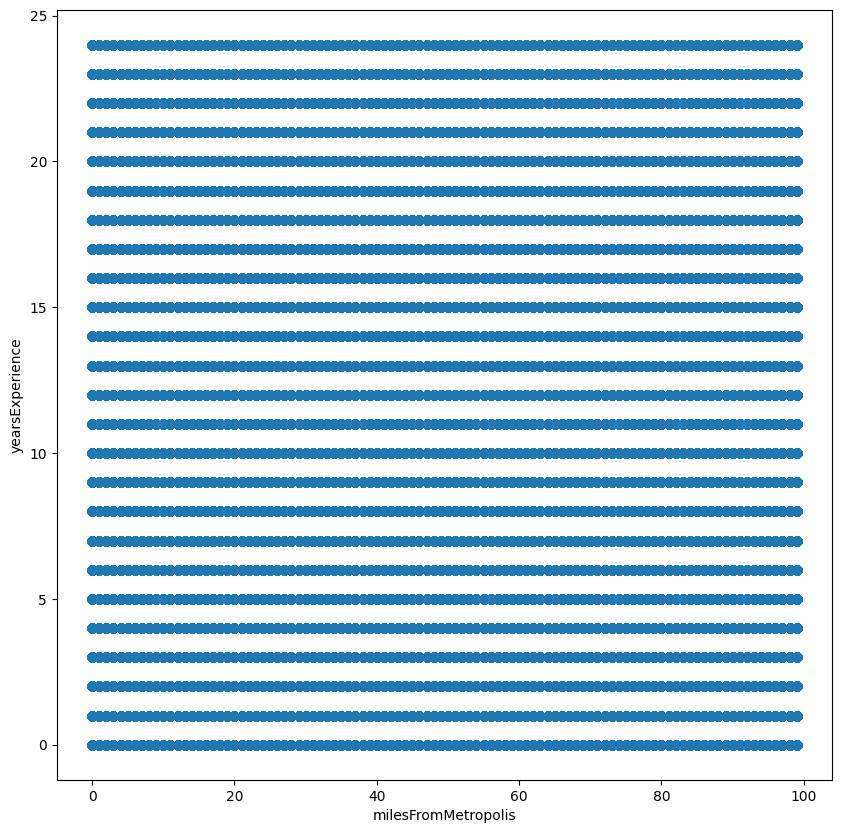

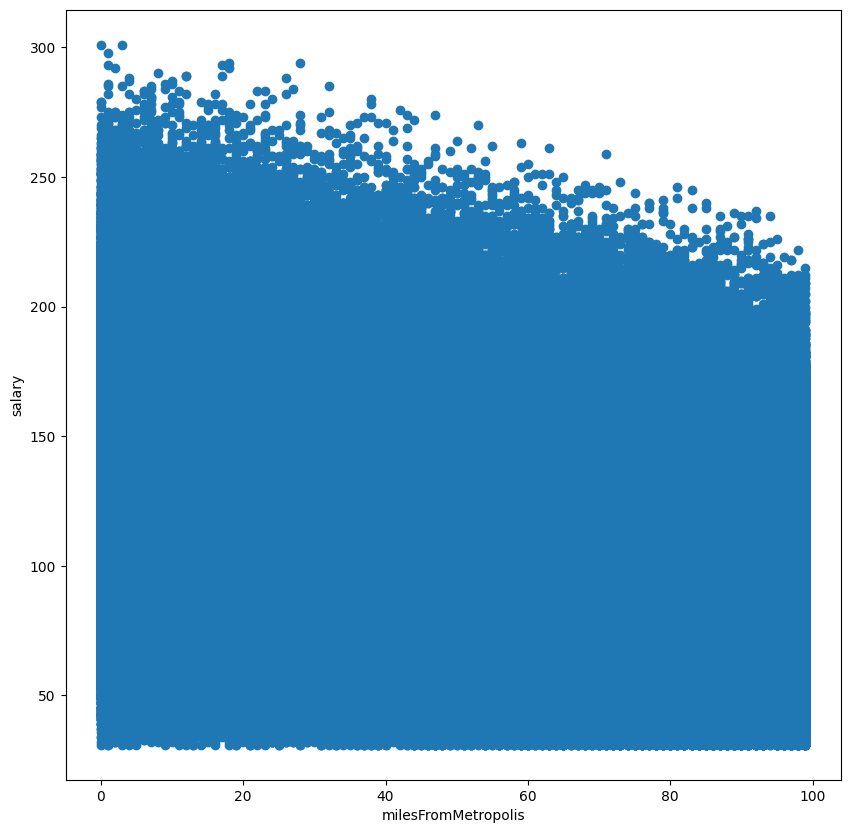

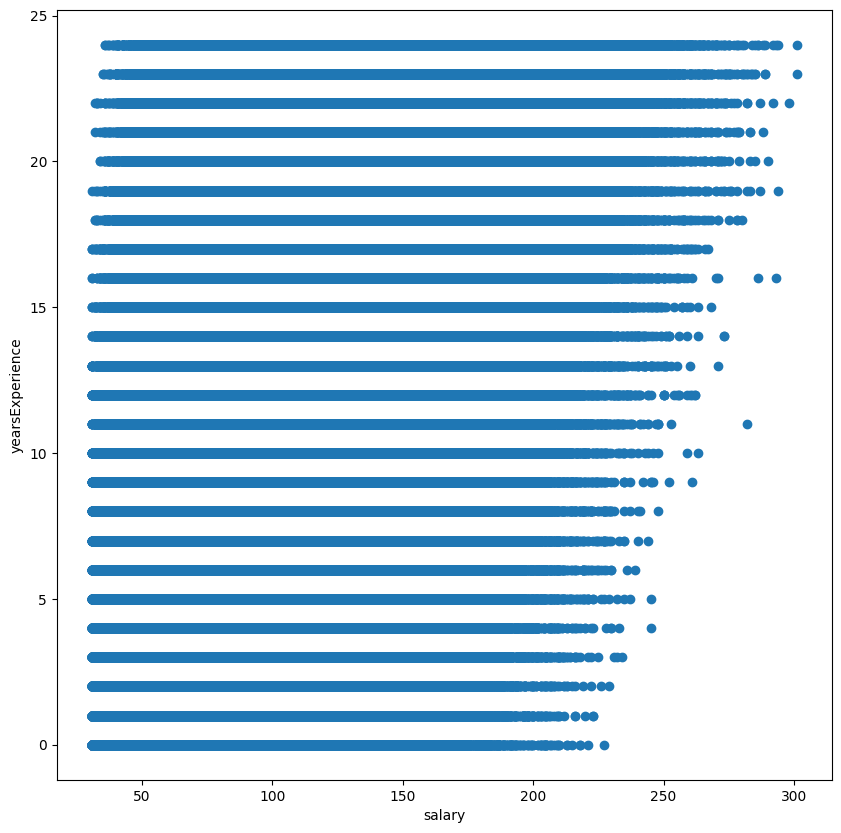

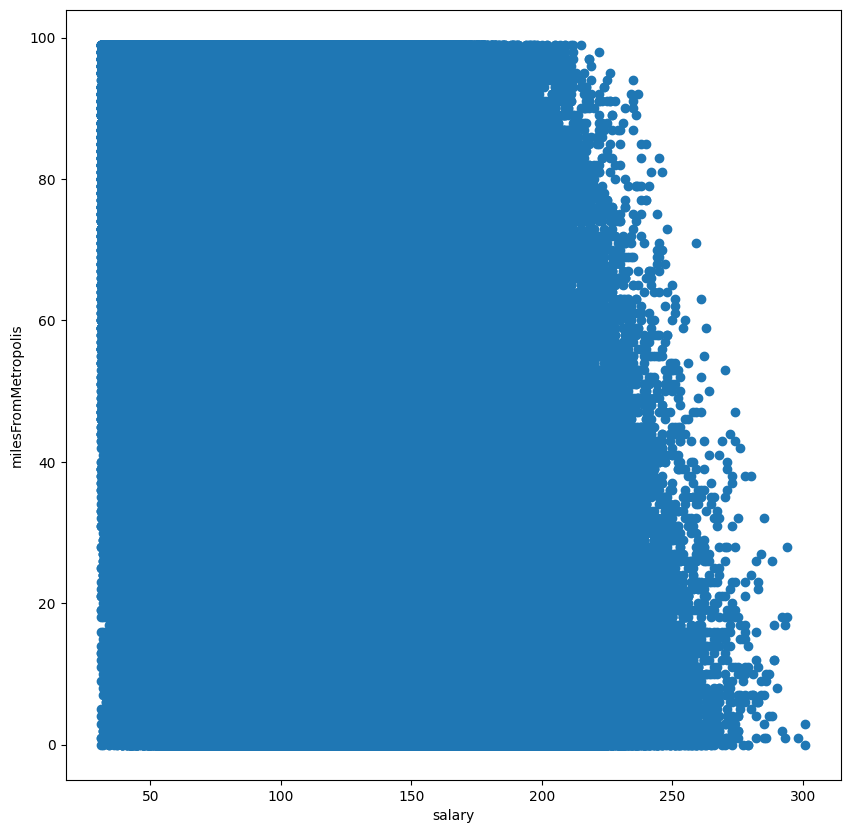

In [ ]:
# scatter plot using matplotlib
# create function
def scatter_plot(x,y):
  plt.figure(figsize=(10,10))
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()

# loop through the different columns
for i in var_list:
  for j in var_list:
    if i != j:
      scatter_plot(i,j)

# creating histogram plot

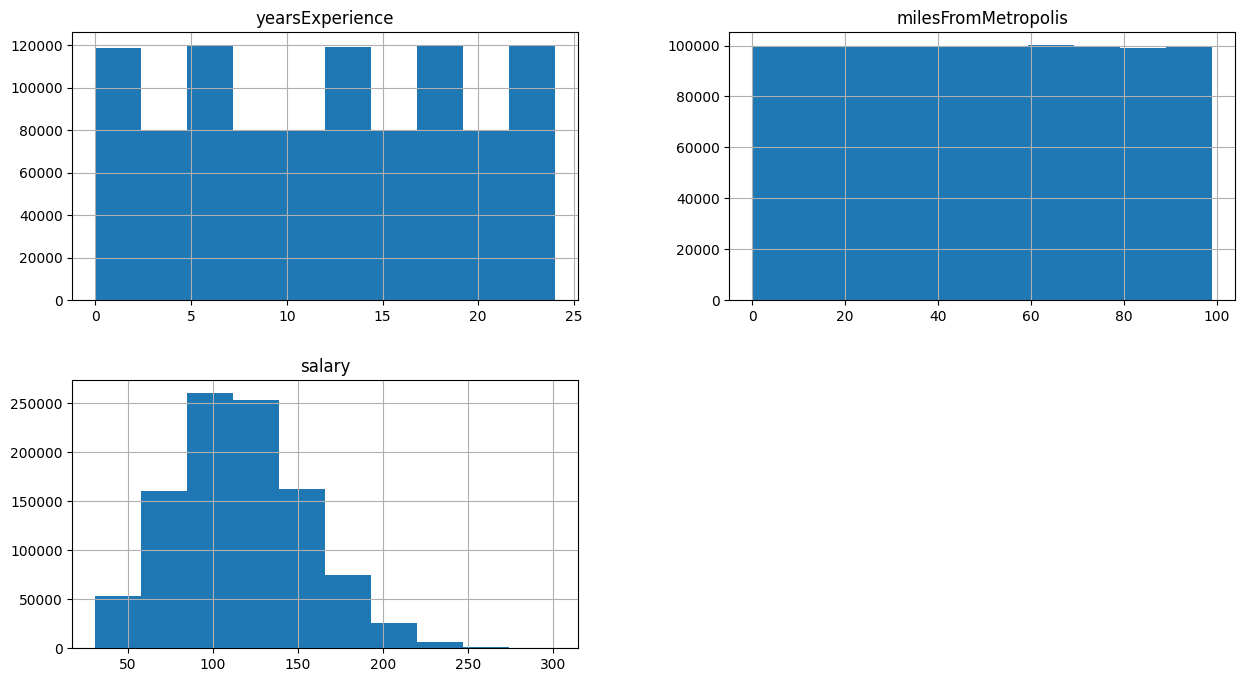

In [ ]:
train_data.hist(figsize=(15,8))
plt.show()

# creating box plot

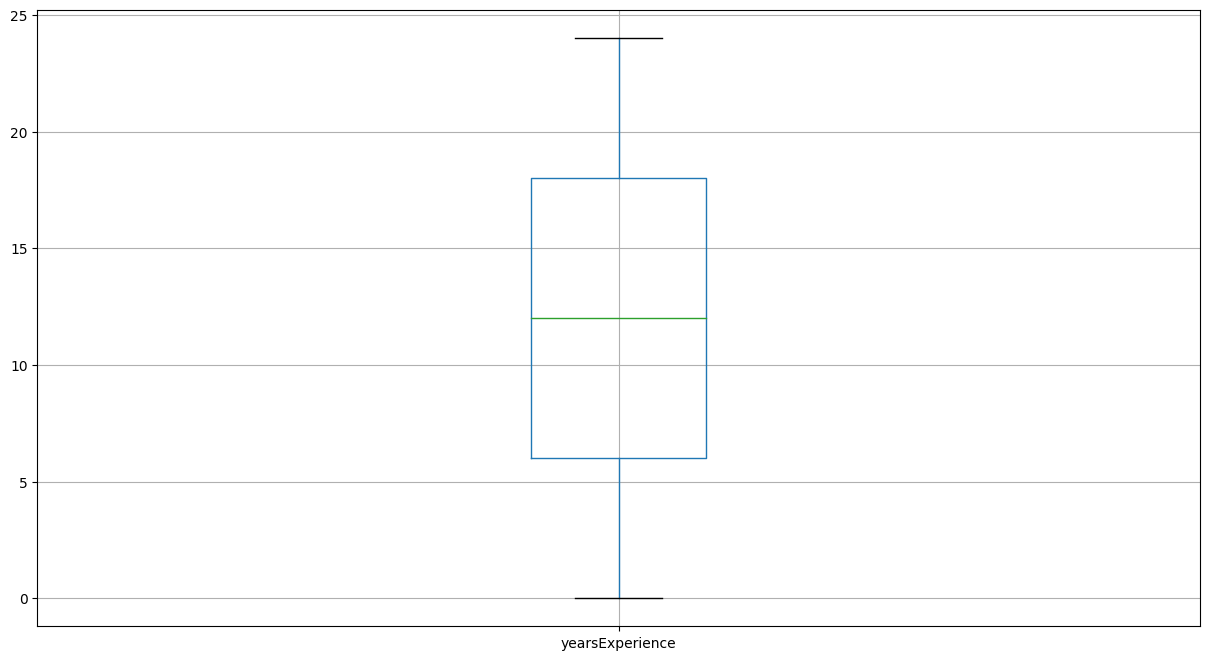

In [ ]:
train_data.boxplot(column='yearsExperience',figsize=(15,8))
plt.show()

# plotting vilon plot
# vilon plot shows relationship between 2 Numerical variable.


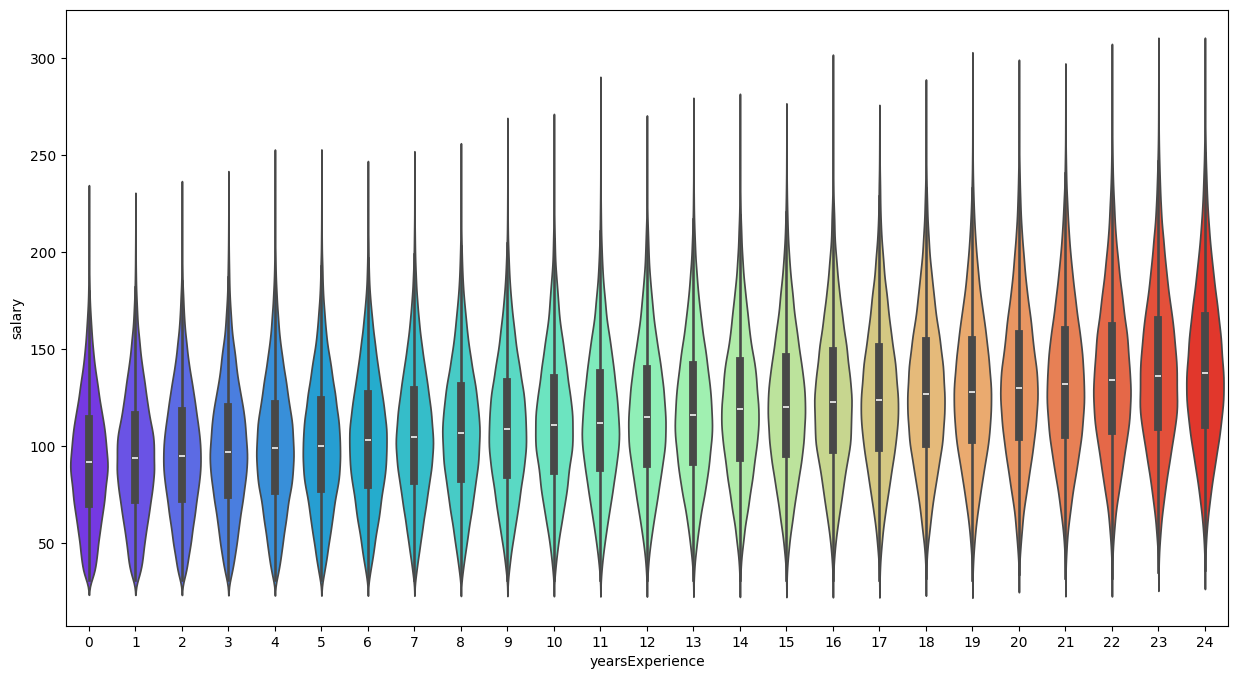

In [ ]:
plt.figure(figsize=(15,8))
sns.violinplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

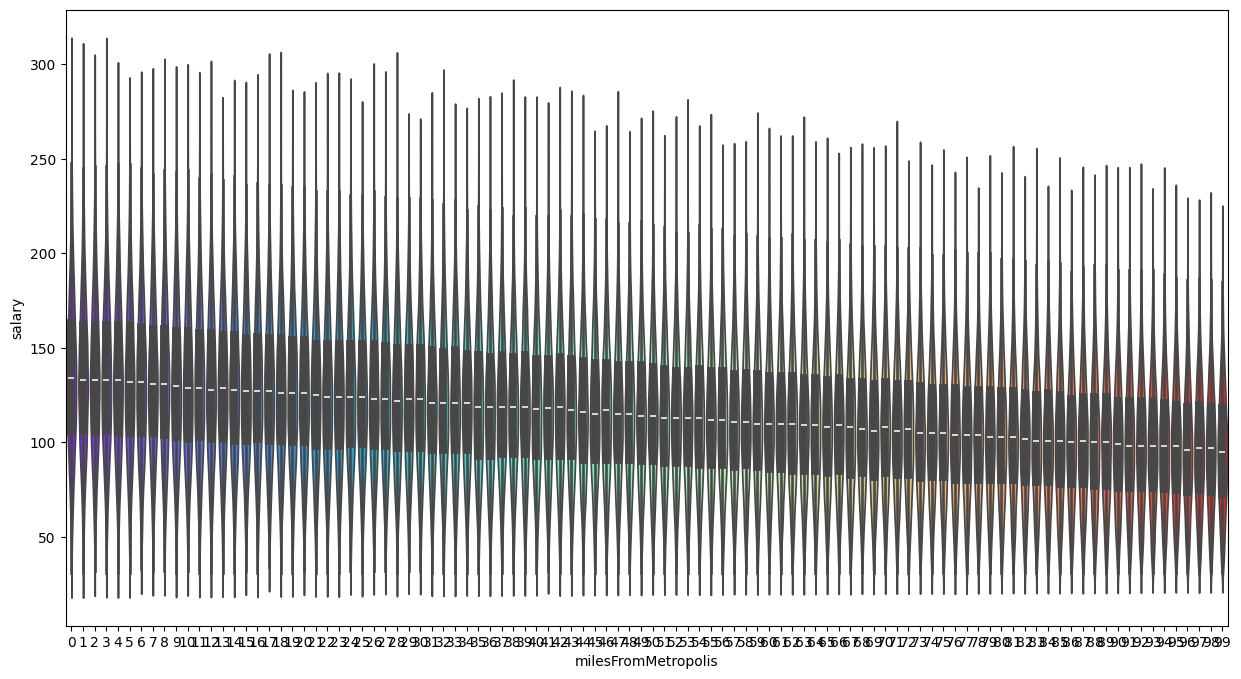

In [ ]:
# vilon plot for milesfrommetropolish from salary columns
plt.figure(figsize=(15,8))
sns.violinplot(x='milesFromMetropolis',y='salary',data=train_data,palette='rainbow')
plt.show()

# Boxen plot
# it plots different quartile values.

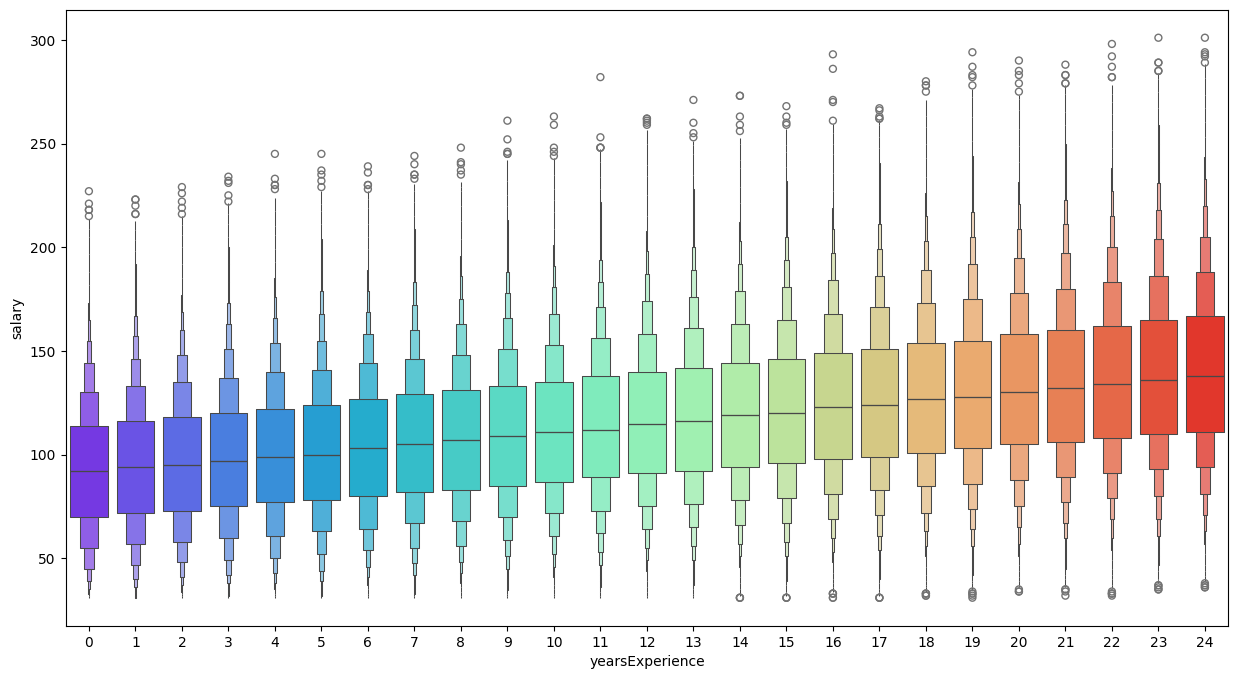

In [ ]:
plt.figure(figsize=(15,8))
sns.boxenplot(x='yearsExperience',y='salary',data=train_data,palette='rainbow')
plt.show()

# Variance inflation factor (VIF)
# its basically take the combination of variables and try to predict R2 values

In [ ]:
# import statsmodel library for vif
import statsmodels.api as sm

In [ ]:
# creating a dataframe of just numerical values
train_for_vif=train_data.drop(['jobType','degree','major','industry',
                         'salary'],axis=1)
#target values
target=train_data['salary']

# numerical values column names
names=['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)
names

['yearsExperience', 'milesFromMetropolis']

In [ ]:
# calculating Vif for each features
for i in range(0,len(names)):
  # taking one columns as target variable
  y= train_for_vif.loc[:,train_for_vif.columns==names[i]]
  #taking all other remaining columns as feature variable
  x= train_for_vif.loc[:,train_for_vif.columns!=names[i]]
  # fitting the OLs model on y and x
  model=sm.OLS(y,x)
  results=model.fit()
  # getting R^2 value vaue of results
  rsq=results.rsquared
  # calculating vif value
  vif=round(1/(1-rsq),2)
  print("R Square value of {} column is {} keeping all other columns as features".format(names[i],(round(rsq,2))))
  print ("Variance inflation Factor of {} columns is {} \n".format(names[i],(vif)))

R Square value of yearsExperience column is 0.55 keeping all other columns as features
Variance inflation Factor of yearsExperience columns is 2.22 

R Square value of milesFromMetropolis column is 0.55 keeping all other columns as features
Variance inflation Factor of milesFromMetropolis columns is 2.22 



# Observation
# yearsexperience and milesfrommetropolis both have colinearity with all the variablees

**ANNOVA TEST**

In [ ]:
# perform ANNOVA test between 2 variables
def perform_anova_test(x,y):

  train_anova=train_data[[x,y]]


  groups = train_anova.groupby(x).count().reset_index()

  print(groups)

  unique_majors = train_anova[x].unique()
  for major in unique_majors:
    stats.probplot(train_anova[train_anova[x] == major][y], dist="norm", plot=plt)
    plt.title(f"Probability Plot-" + str(major))
    plt.show()

# calculate ratio of largest to the smallest sample standard deviation
  ratio=train_anova.groupby(x).std().max() / train_anova.groupby(x).std().min()
  print(ratio)


# Create annova backbone table
  data = [['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]
  anova_table=pd.DataFrame(data,columns=['Source of Variation','SS','df','MS','F','p-value','F crit'])
  anova_table.set_index('Source of Variation',inplace=True)

# calculate SSTR(Sum of Squares for Treatment ) and update anova table
  x_bar = train_anova[y].mean()
  SSTR = train_anova.groupby(x).count() * (train_anova.groupby(x).mean() - x_bar)**2
  anova_table['SS']['Between Groups'] = SSTR[y].sum()

# calculate SSE (Sum of Squares due to Error) and update anova table
  SSE = (train_anova.groupby(x).count() - 1) * train_anova.groupby(x).std()**2
  anova_table['SS']['Within Groups'] = SSE[y].sum()

# calculate SSTR(Sum of Squares for Treatment ) and update anova table
  SSTR=SSTR[y].sum() + SSE[y].sum()
  anova_table['SS']['Total'] = SSTR

# calculate degrees of freedom and update anova table
  anova_table['df']['Between Groups'] = train_anova[x].nunique() - 1
  anova_table['df']['Within Groups'] = train_anova.shape[0] - train_anova[x].nunique()
  anova_table['df']['Total'] = train_anova.shape[0] - 1

# calculate mean squared
  anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F
  F= anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
  anova_table['F']['Between Groups'] = F

# calculate p-value
  # Calculate p-value
  p_value = 1 - stats.f.cdf(F, anova_table.loc['Between Groups', 'df'], anova_table.loc['Within Groups', 'df'])
  anova_table.loc['Between Groups', 'p-value'] = p_value



# F critical
  alpha=0.05

#possible types "right-tailed",'left-tailed',two-tailed
  tail_hypothesis_type='two-tailed'
  if tail_hypothesis_type=='two-tailed':
    alpha/=2
  anova_table['F crit']['Between Groups']=stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Tables
  print(anova_table)

# the P value approch
  print("Approach 1: p-value approch to test the hypothesis")
  Conclusion="Failed to reject the null hypothesis."
  if anova_table['p-value']['Between Groups'] <=alpha:
     Conclusion="Reject the null hypothesis."
  print("F-score is :",anova_table['F']['Between Groups'],"and p value is:",anova_table['p-value']['Between Groups'])
  print(Conclusion)

  # the critical value approch
  print("Approach 2: critical value approch to test the hypothesis")
  Conclusion="Failed to reject the null hypothesis."
  if anova_table['F']['Between Groups'] > anova_table['F crit']['Between Groups']:
     Conclusion="Reject the null hypothesis."
  print("F-score is :",anova_table['F']['Between Groups'],"and critical value is:",anova_table['F crit']['Between Groups'])
  print(Conclusion)




          jobType  salary
0             CEO  124778
1             CFO  124369
2             CTO  125045
3         JANITOR  122562
4          JUNIOR  124554
5         MANAGER  125120
6          SENIOR  125886
7  VICE_PRESIDENT  125234


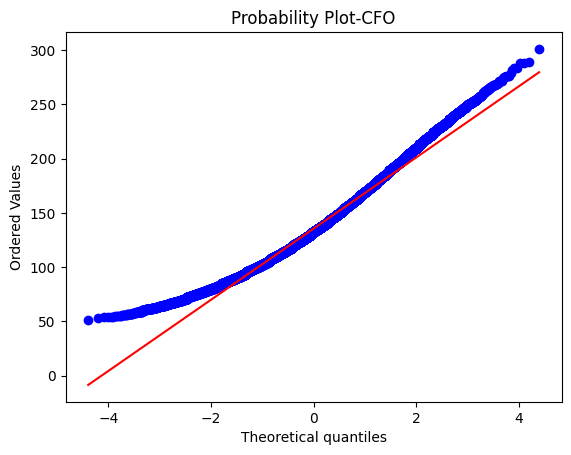

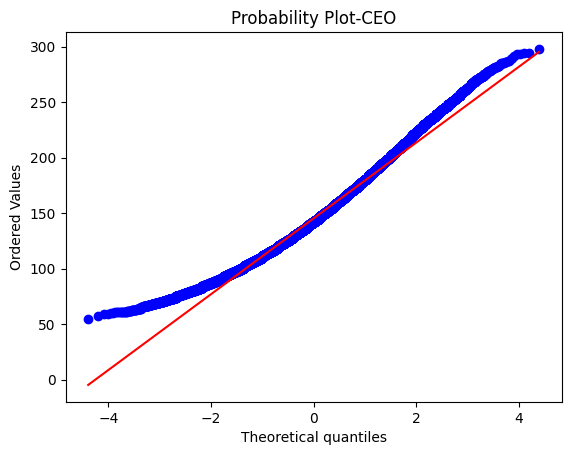

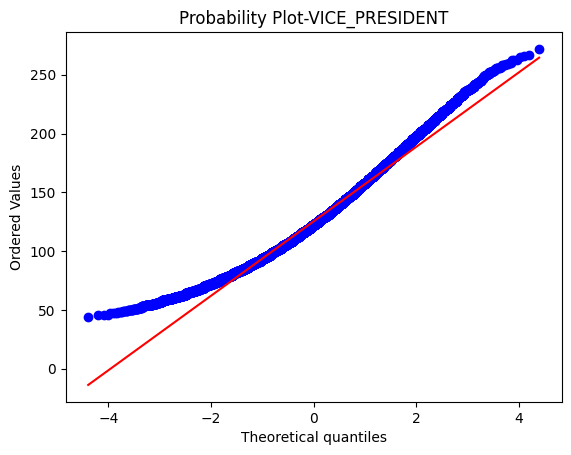

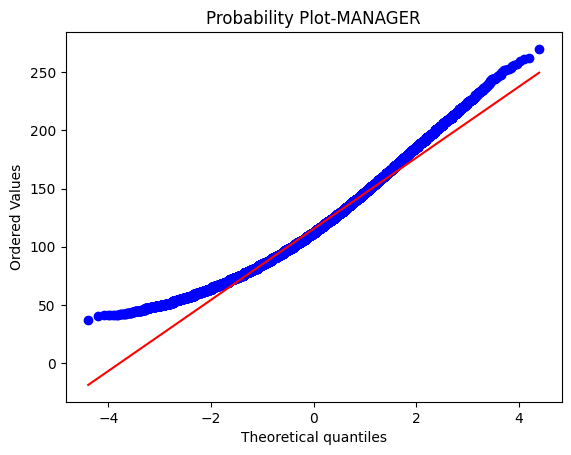

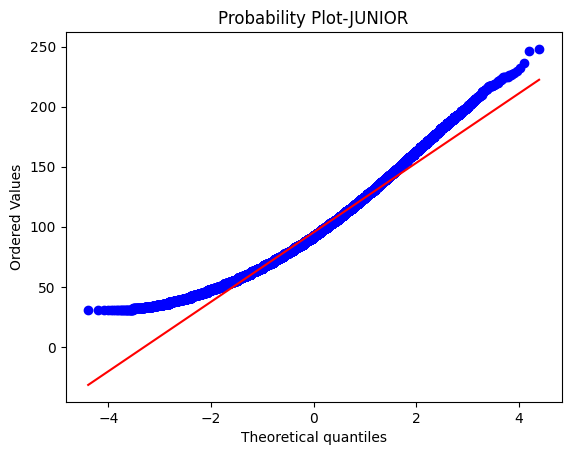

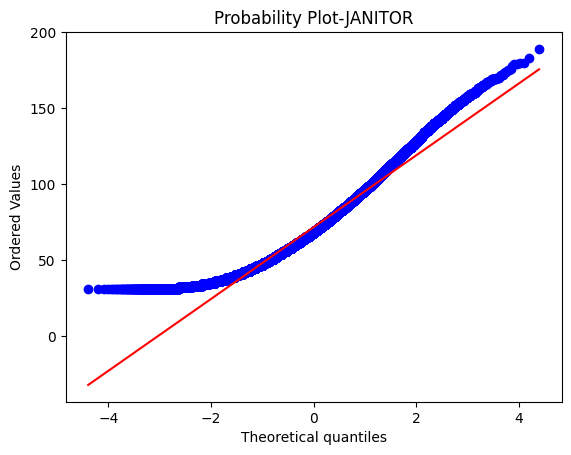

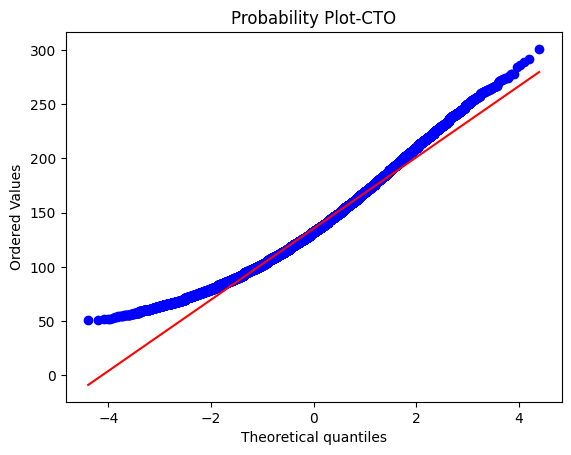

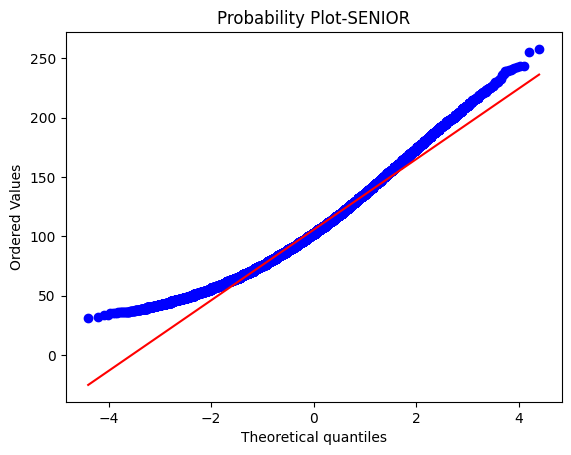

salary    1.428316
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        520557906.406689       7  74365415.200956  77349.961883   
Within Groups         959049939.703873  997540       961.415021                 
Total                1479607846.110561  997547      1483.246249                 

                    p-value   F crit  
Source of Variation                   
Between Groups          0.0  2.28755  
Within Groups                         
Total                                 
Approach 1: p-value approch to test the hypothesis
F-score is : 77349.96188255494 and p value is: 1.1102230246251565e-16
Reject the null hypothesis.
Approach 2: critical value approch to test the hypothesis
F-score is : 77349.96188255494 and critical value is: 2.2875503809763478
Reject the null hypothesis.


In [ ]:
perform_anova_test('jobType','salary')

        degree  salary
0    BACHELORS  175495
1     DOCTORAL  175362
2  HIGH_SCHOOL  235769
3      MASTERS  175310
4         NONE  235612


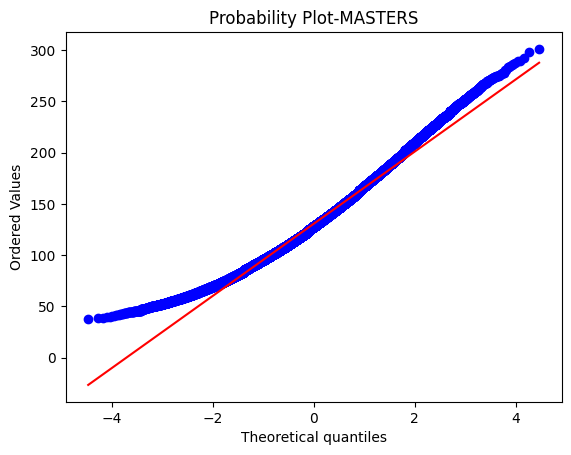

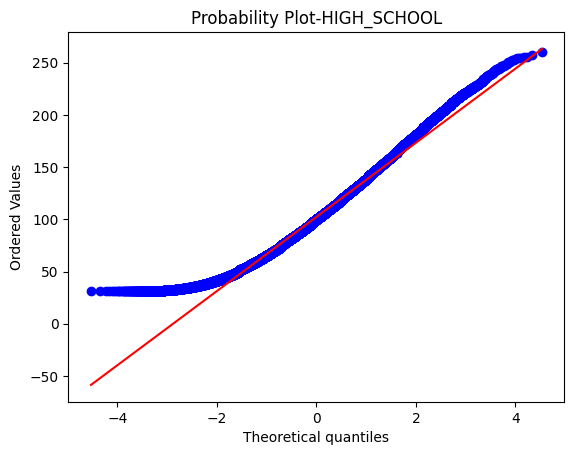

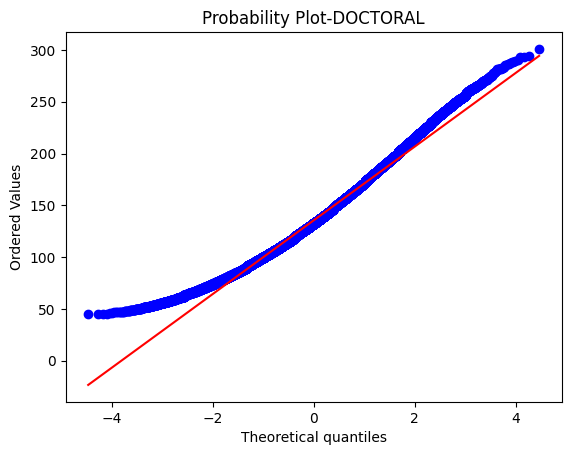

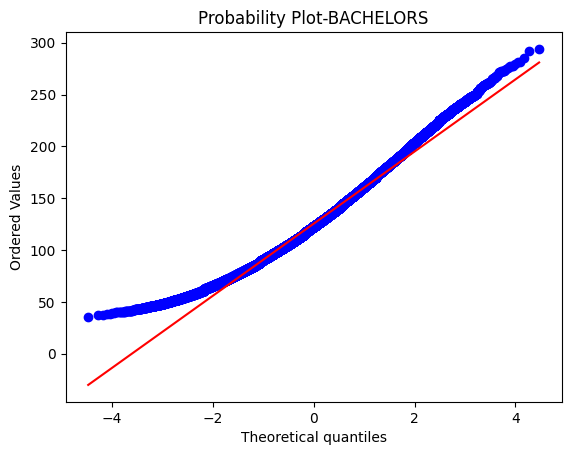

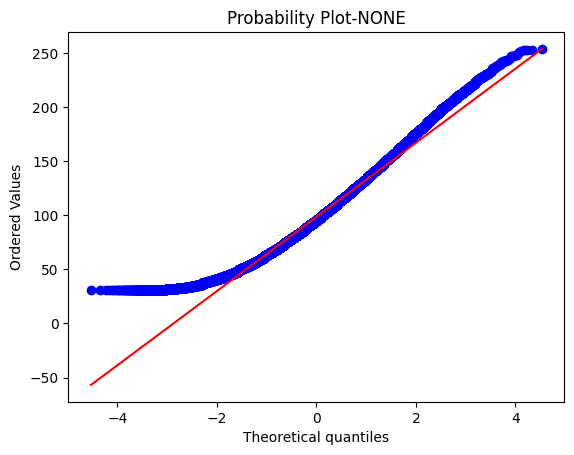

salary    1.034168
dtype: float64
                                    SS      df               MS             F  \
Source of Variation                                                             
Between Groups        235082352.781875       4  58770588.195469  47107.262306   
Within Groups        1244525493.328681  997543      1247.590824                 
Total                1479607846.110556  997547      1483.246249                 

                    p-value    F crit  
Source of Variation                    
Between Groups          0.0  2.785834  
Within Groups                          
Total                                  
Approach 1: p-value approch to test the hypothesis
F-score is : 47107.26230562572 and p value is: 1.1102230246251565e-16
Reject the null hypothesis.
Approach 2: critical value approch to test the hypothesis
F-score is : 47107.26230562572 and critical value is: 2.7858344627125904
Reject the null hypothesis.


In [ ]:
perform_anova_test('degree','salary')

# Dendogram
## Shows relationship between 2 variable


<function matplotlib.pyplot.show(close=None, block=None)>

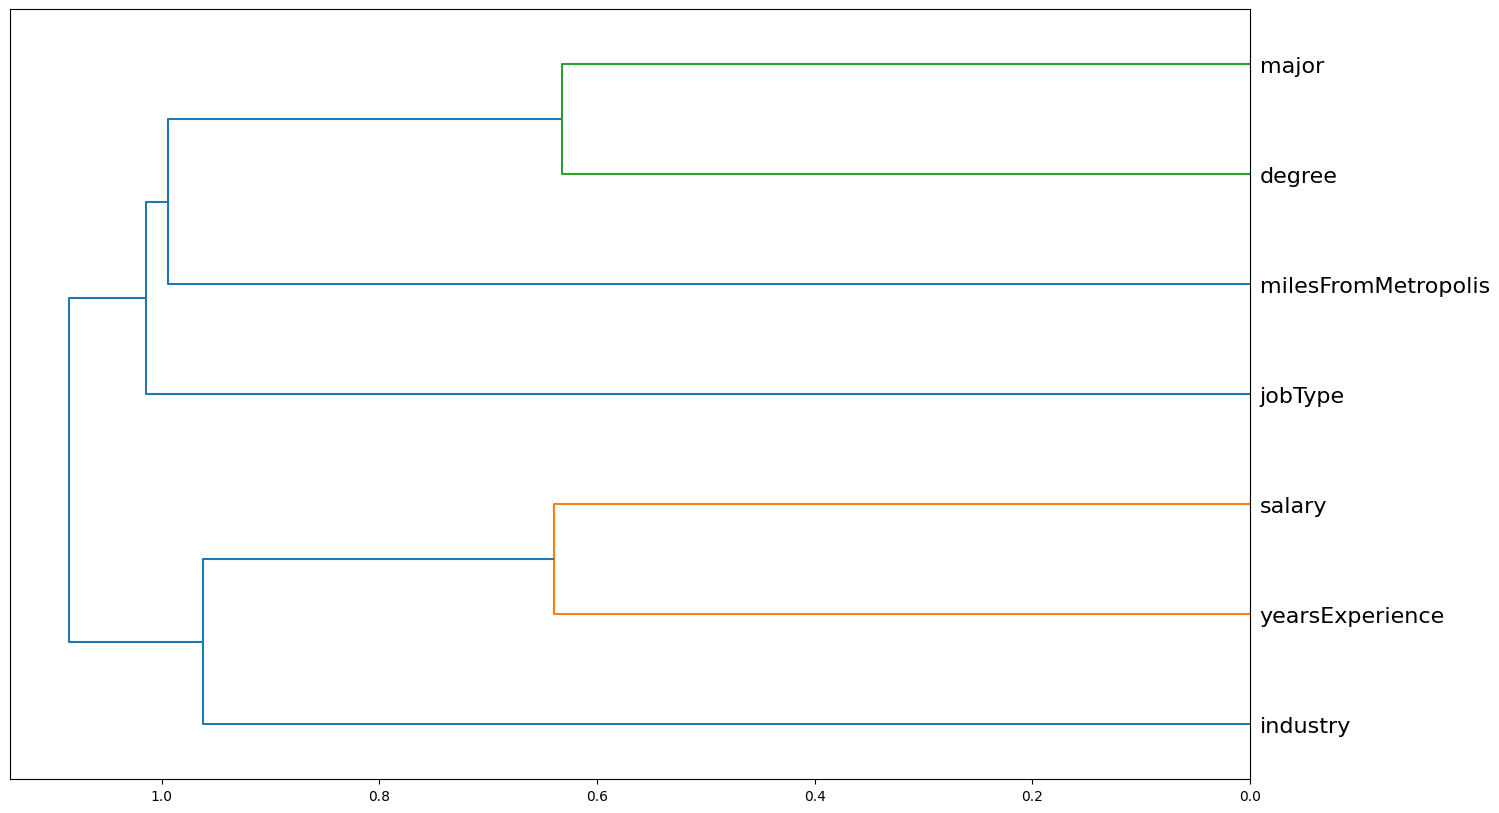

In [ ]:
# plot dendogram on the colummns of the data set(use 50000 sample of 1000000)
X=train_data[1:50000]

import scipy
from scipy.cluster import hierarchy as hc

corr=np.round(scipy.stats.spearmanr(X).correlation,4)
corr_condensed=hc.distance.squareform(1-corr)
z=hc.linkage(corr_condensed,method='average')

fig=plt.figure(figsize=(16,10))
dendrogram=hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show

# scaling
# it reduces the variance between different variables as data is highly distributed


In [ ]:
# scaling using min max scaler
def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()

  df[col]=scaler.fit_transform(df[col])
  return df

In [ ]:
# making a list of column name to be scaled
col_train=['yearsExperience','milesFromMetropolis']

train_data=scale_data(train_data,col_train)

# Modelling

In [ ]:
from sklearn.preprocessing import OneHotEncoder as sklernOneHotEncoder

# class for containing all functionality required for one hot encoding
class OneHotEncoder(sklernOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder,self).__init__(**kwargs)
        self.fit_flag=False

    # helper function to fit the data
    def fit(self,X,**kwargs):
      out=super().fit(X)
      self.fit_flag=True
      return out

    # helper function to transform the data
    def transform(self,X,**kwargs):
      sparse_matrix=super(OneHotEncoder,self).transform(X)
      new_columns=self.get_new_columns(X=X)
      d_out=pd.DataFrame(sparse_matrix.toarray(),columns=new_columns,index=X.index)
      return d_out

    # helper function to fit and transform data
    def get_new_columns(self,X):
      new_columns=[]
      for i,column in enumerate(X.columns):
        j=0
        while j<len(self.categories_[i]):
          new_columns.append(f"{column}_{self.categories_[i][j]}")
          j+=1
      return new_columns





In [ ]:
# split the labels and target
train_X=train_data.drop(['salary','yearsExperience','milesFromMetropolis'],axis=1)
train_Y=train_data['salary']

In [ ]:
# feature
train_X.head()

,jobType,degree,major,industry
0,CFO,MASTERS,MATH,HEALTH
1,CEO,HIGH_SCHOOL,NONE,WEB
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE


In [ ]:
train_Y.head()

,salary
0,130
1,101
2,137
3,142
4,163


In [ ]:
# onehot encoder
encoder=OneHotEncoder()
train_X=encoder.fit_transform(train_X)
train_X = train_X.join(train_data['yearsExperience'])
train_X = train_X.join(train_data['milesFromMetropolis'])
train_X.head()


,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.838384
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.125000,0.737374
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.416667,0.383838
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.171717
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.161616


In [ ]:
# from sklearn.model selection
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_X,train_Y,test_size=0.2)

In [ ]:
# import necessary libraries for getting metrics of model
import math
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error

# function for calculating RMSE
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

# def func for calculating all relevent matrics
def print_score(m):
  res = [rmse(m.predict(X_train), Y_train), rmse(m.predict(X_test), Y_test),
         m.score(X_train, Y_train), m.score(X_test, Y_test),
         median_absolute_error(m.predict(X_train),Y_train),median_absolute_error(m.predict(X_test),Y_test),
         metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),]

  print("RMSE-train:" + str(res[0]) + "\nRMSE:" + str(res[1]) + "\nScore-Train:" + str(res[2])+"\nScore-Test:" + str(res[3])+
      "\nMedAE-Train:" + str(res[4]) + "\nMedAE-Test:" + str(res[5]) + "\nMAE-Train:" + str(res[6]) + "\nMAE-Test:" + str(res[7]) + "\n")

In [ ]:
# visualizing imortance of all features in the data set
def visualize_importance(feature_importances,feat_train_df):
  feature_importance_df=pd.DataFrame()
  _df=pd.DataFrame()
  _df['feature_importance']=feature_importances
  _df['column']=feat_train_df.columns
  feature_importance_df=pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)

  # grouping all data and soting inn desending order
  order=feature_importance_df.groupby('column')\
  .sum()[['feature_importance']]\
  .sort_values('feature_importance',ascending=False).index[:50]

  # plotting feature
  fig,ax=plt.subplots(figsize=(8,max(6,len(order)*.25)))
  sns.boxenplot(data=feature_importance_df,
                x='feature_importance',
                y='column',
                order=order,
                ax=ax,
                palette='viridis',
                orient='h')
  ax.tick_params(axis='x',rotation=90)
  ax.set_title('feature importance')
  ax.grid()
  fig.tight_layout()
  return fig,ax



# Linear regression

RMSE-train:19.63550070441392
RMSE:19.593125945152412
Score-Train:0.739721944251658
Score-Test:0.7425241041052058
MedAE-Train:13.76953125
MedAE-Test:13.74609375
MAE-Train:15.874003606148767
MAE-Test:15.848109861347803

CPU times: user 3.35 s, sys: 714 ms, total: 4.06 s
Wall time: 3.68 s


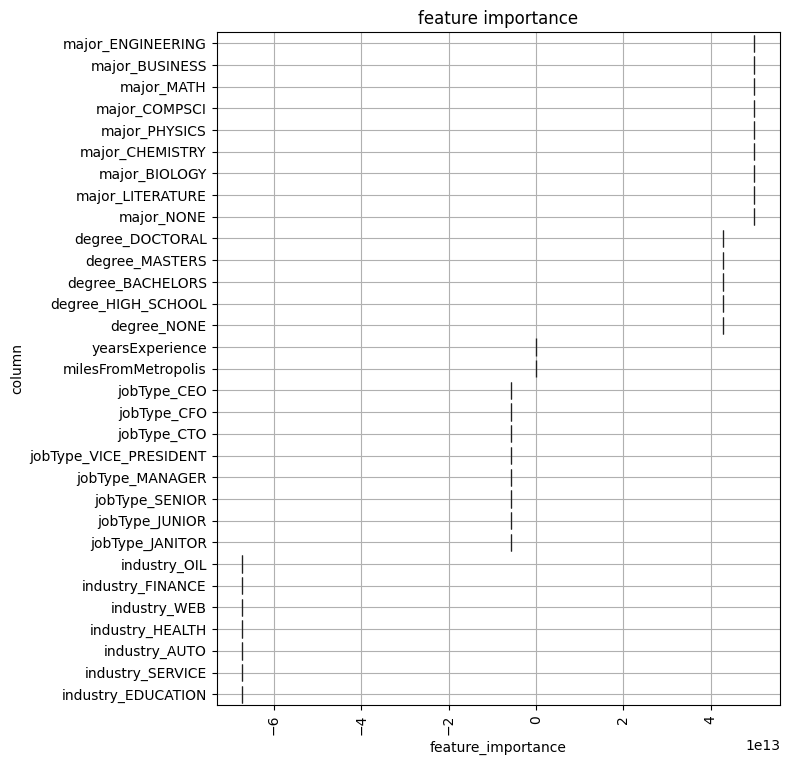

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)
print_score(lr)
#visualizing importance of feature
fig,ax=visualize_importance(lr.coef_,X_train)

#Random forest regressor

RMSE-train:10.492562098750035
RMSE:21.037684151657963
Score-Train:0.9256781194700375
Score-Test:0.7031582530561111
MedAE-Train:6.485440476190476
MedAE-Test:14.180000000000007
MAE-Train:8.066135369248945
MAE-Test:16.766621321628808

CPU times: user 13min 30s, sys: 7.9 s, total: 13min 38s
Wall time: 14min 10s


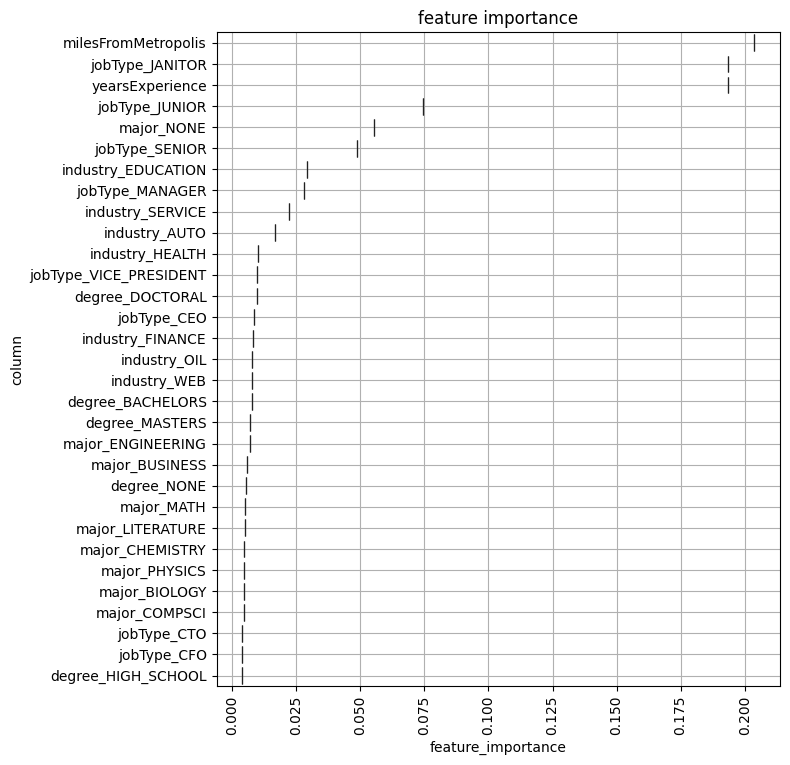

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
print_score(rf)
#visualizing importance of feature
fig,ax=visualize_importance(rf.feature_importances_,X_train.iloc[1:500])

# KNN test

In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
print_score(knn)


RMSE-train:26.552880105012886
RMSE:26.5430042748752
Score-Train:0.5240329787222046
Score-Test:0.5274701246140323
MedAE-Train:17.400000000000006
MedAE-Test:17.200000000000003
MAE-Train:20.887191837982655
MAE-Test:20.859555911984366

CPU times: user 31.7 s, sys: 540 ms, total: 32.3 s
Wall time: 32.3 s


# Gradient Boosting Regressor

RMSE-train:20.705026085800952
RMSE:20.66796862426567
Score-Train:0.710595581498572
Score-Test:0.713499948200679
MedAE-Train:14.19252888326426
MedAE-Test:14.198428839841583
MAE-Train:16.56687119714149
MAE-Test:16.536174911648576

CPU times: user 9.94 s, sys: 513 ms, total: 10.5 s
Wall time: 10.4 s


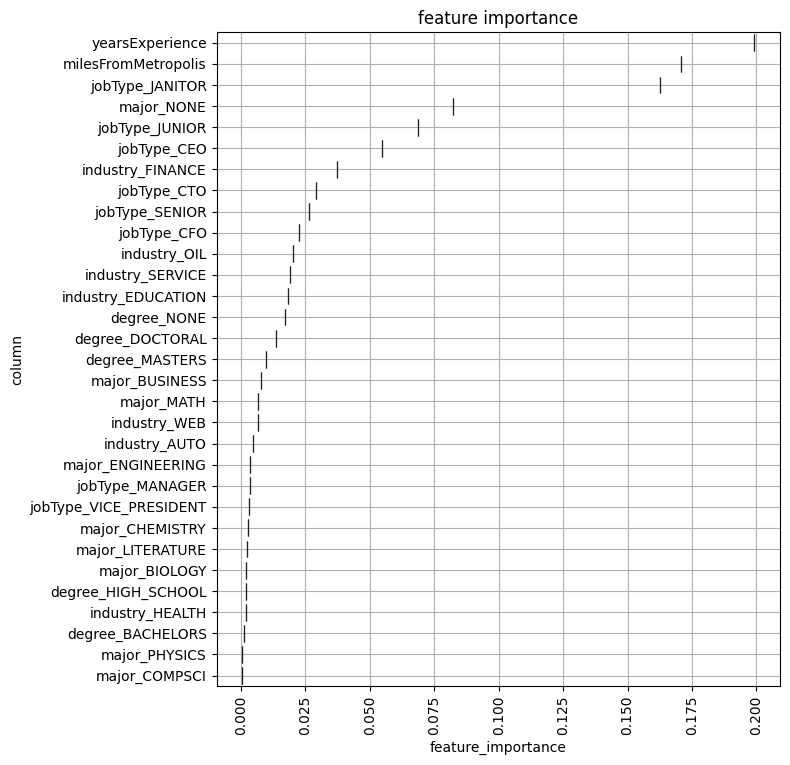

In [ ]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
print_score(gbr)
fig,ax=visualize_importance(gbr.feature_importances_,X_train.iloc[1:1000])

# Decision Tree Regressor

In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
print_score(dtr)

RMSE-train:26.805224262137408
RMSE:27.672601266780887
Score-Train:0.514943327087568
Score-Test:0.4863951827246008
MedAE-Train:16.0
MedAE-Test:17.0
MAE-Train:20.242027530852745
MAE-Test:21.56424155848495

CPU times: user 2.44 s, sys: 285 ms, total: 2.73 s
Wall time: 2.76 s


# AdaBoost Regressor

RMSE-train:24.368313764448136
RMSE:24.358126409301835
Score-Train:0.599129083121041
Score-Test:0.6020606579100364
MedAE-Train:17.901333333333326
MedAE-Test:17.905263157894723
MAE-Train:19.979222787684638
MAE-Test:19.986818874271925

CPU times: user 26.2 s, sys: 11.5 s, total: 37.7 s
Wall time: 37.9 s


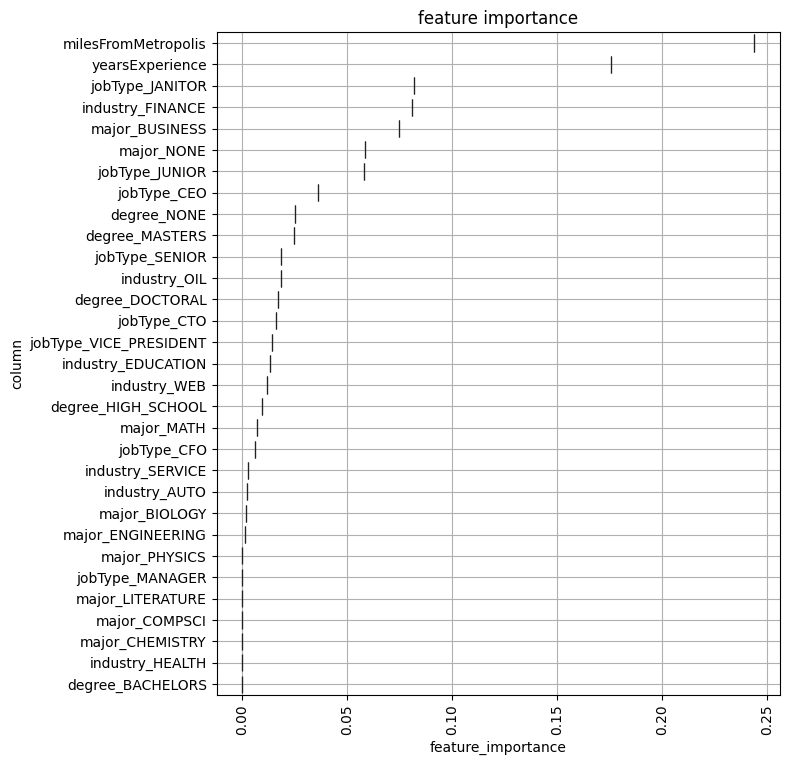

In [ ]:
%%time
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
print_score(abr)
fig,ax=visualize_importance(abr.feature_importances_,X_train.iloc[1:1000])

# XGBoost

RMSE-train:22.87337917482497
RMSE:22.81246178135258
Score-Train:0.6468052396086088
Score-Test:0.6509614256633749
MedAE-Train:15.126537322998047
MedAE-Test:15.026817321777344
MAE-Train:18.09586350896467
MAE-Test:18.04457123330838

CPU times: user 17.4 s, sys: 139 ms, total: 17.6 s
Wall time: 11.4 s


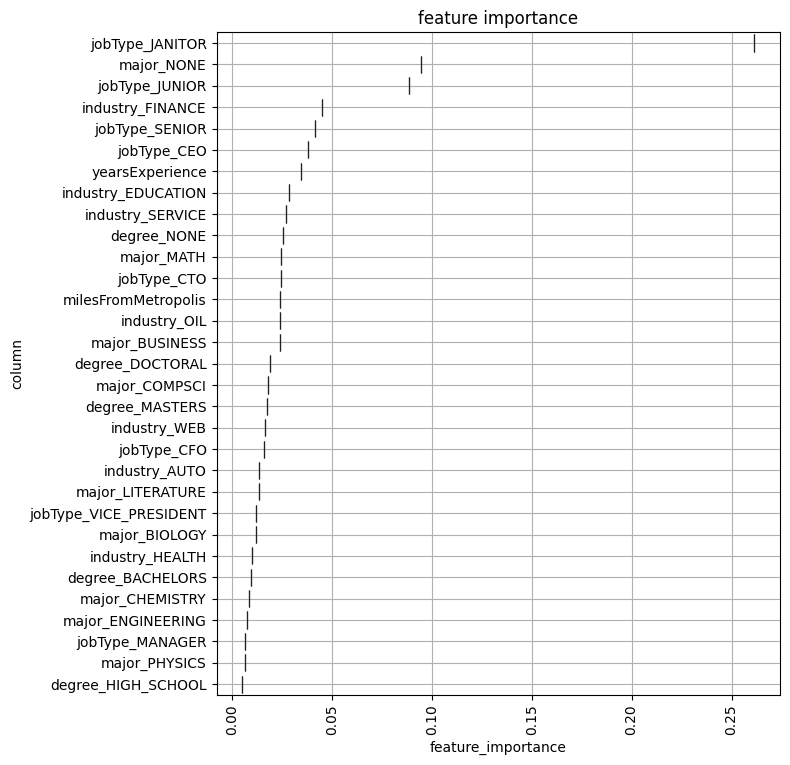

In [ ]:
%%time
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
print_score(xgb)
fig,ax=visualize_importance(xgb.feature_importances_,X_train.iloc[1:1000])

# Light Gradiant Boosted Machine

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 182
[LightGBM] [Info] Number of data points in the train set: 999, number of used features: 31
[LightGBM] [Info] Start training from score 115.276276
RMSE-train:21.400853791141103
RMSE:21.340967111692525
Score-Train:0.6908168671901289
Score-Test:0.6945379157718161
MedAE-Train:14.391344555384023
MedAE-Test:14.370339934119698
MAE-Train:17.042173883925955
MAE-Test:16.997347767408595

CPU times: user 39 s, sys: 540 ms, total: 39.6 s
Wall time: 39.7 s


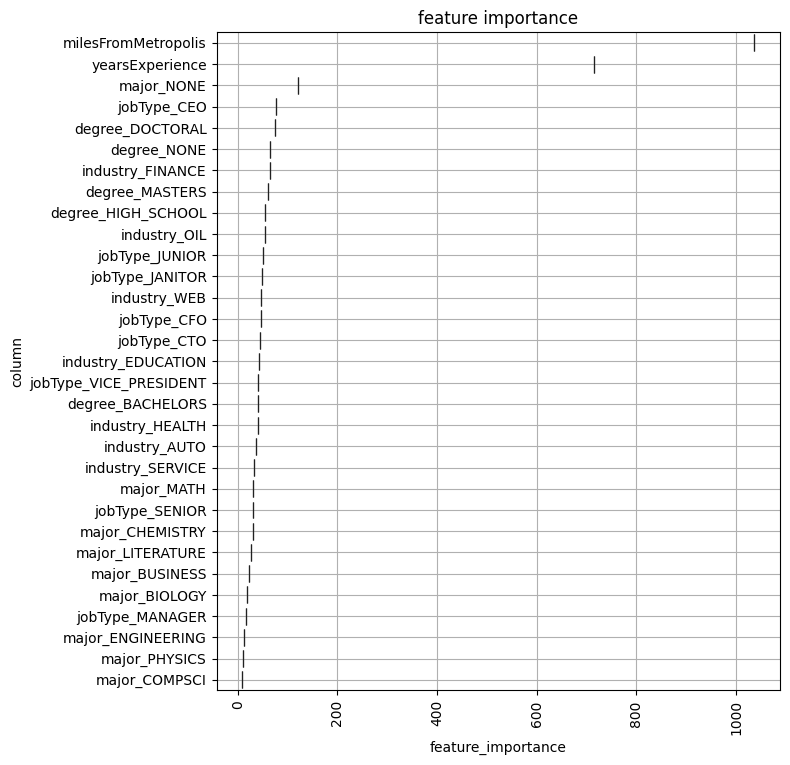

In [ ]:
%%time
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()
lgbm.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
print_score(lgbm)
fig,ax=visualize_importance(lgbm.feature_importances_,X_train.iloc[1:1000])

# Comparing all models based on metrics

In [ ]:
def compare_models(models,names,X_train,X_test,Y_train,Y_test):
  # libraries we need
  import sklearn.metrics as metrics
  from sklearn.model_selection import train_test_split

  # now create a list with the objects
  data={'Metrics':['rmse','MedAE','MAE','R-squared']}
  df_train=pd.DataFrame(data)
  df_test=pd.DataFrame(data)

  def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

  # loop through all the models
  for (model,name) in zip(models,names):
    y_pred=model.predict(X_test)
    res=[rmse(model.predict(X_train), Y_train),
         rmse(model.predict(X_test), Y_test),
         metrics.median_absolute_error(model.predict(X_train),Y_train),
         metrics.median_absolute_error(model.predict(X_test),Y_test),
         metrics.r2_score(model.predict(X_train),Y_train),
         metrics.r2_score(model.predict(X_test),Y_test)]
    df_train[name]=[res[0],res[2],res[4],res[5]]
    df_test[name]= [res[1],res[3],res[5],res[5]]
  return df_train,df_test


In [ ]:
# list of models object
# list of model names
models=[lr,rf,knn,gbr,dtr,abr,xgb,lgbm]
names=['lr','rf','knn','gbr','dtr','abr','xgb','lgbm']
comp_model_train,comp_model_test=compare_models(models,names,X_train,X_test,Y_train,Y_test)

# RMSE of all model on train and test data

In [ ]:
# printing rmse comparision of model on train and test
print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

  Metrics         lr         rf       knn        gbr        dtr        abr  \
0    rmse  19.635501  10.492562  26.55288  20.705026  26.805224  24.368314   

         xgb       lgbm  
0  22.873379  21.400854  


  Metrics         lr         rf        knn        gbr        dtr        abr  \
0    rmse  19.593126  21.037684  26.543004  20.667969  27.672601  24.358126   

         xgb       lgbm  
0  22.812462  21.340967  


In [ ]:
# print comparision of model on train and test
print("Result on Test data")
comp_model_test

Result on Test data


,Metrics,lr,rf,knn,gbr,dtr,abr,xgb,lgbm
0,rmse,19.593126,21.037684,26.543004,20.667969,27.672601,24.358126,22.812462,21.340967
1,MedAE,13.746094,14.180000,17.200000,14.198429,17.000000,17.905263,15.026817,14.370340
2,MAE,0.650441,0.635309,0.120733,0.553861,0.490181,0.093921,0.538035,0.590066
3,R-squared,0.650441,0.635309,0.120733,0.553861,0.490181,0.093921,0.538035,0.590066


# Hyper parameter tunning

In [ ]:
# helper function to perform hyper parameter tunning with Randomized search CV
def random_search(model,param_grid,X_train,Y_train):
  from sklearn.model_selection import RandomizedSearchCV

  #random saerch for parameter using 3 fold cross validation
  # search accross 100 different combination
  random_search=RandomizedSearchCV(estimator=model,
                                    param_distributions=param_grid,
                                    n_iter=20,
                                    cv=3,
                                    verbose=2,
                                    random_state=42,
                                    n_jobs=-1)
  random_search.fit(X_train.iloc[1:1000],Y_train.iloc[1:1000])
  # Access the best_params_ attribute from the random_search object
  print(random_search.best_params_)


# create RandomForestRegressor parameter dict for tunning
rf_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
              'max_features':['auto','sqrt'],
              # Convert the values generated by np.linspace to integers
              'max_depth': np.linspace(1,32,32,endpoint=True).astype(int),
              'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
              'bootstrap':[True,False]}

# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestRegressor(),rf_para_grid,X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 32, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


# Gradiant boosting

In [ ]:
# gradiant Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

Gbr_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
               'learning_rate':[1,0.5,0.25,0.1,0.05,0.01],
               # Convert the values generated by np.linspace to integers.
               'max_depth':np.linspace(1,32,32,endpoint=True).astype(int),
               'min_samples_split':np.linspace(0.1,1.0,10,endpoint=True)}

# Passing data for hyper parameter tunning with randomized search cv
random_search(GradientBoostingRegressor(),Gbr_para_grid,X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 64, 'min_samples_split': 0.5, 'max_depth': 29, 'learning_rate': 0.25}


# DecisionTreeRegressor

In [ ]:
# create DecisionTreeRegressor dict for tunning
DTR_para_grid={'splitter':['best','random'],
               'max_depth':np.linspace(1,32,32,endpoint=True).astype(int),
               'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
               'min_weight_fraction_leaf':[0.1,0.2,0.5,0.9],
               'max_features':['auto','sqrt','log2',None],
               }

# Passing data for hyper parameter tunning with randomized search cv
random_search(DecisionTreeRegressor(),DTR_para_grid,X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 20}


# XgBoostRegressor

In [ ]:
# XgBoostRegressor
from xgboost import XGBRegressor
XGB_para_grid={'learning_rate':[0.05,0.1,0.15],
               'max_depth':range(3,10,2),
               'min_child_weight':range(1,6,2),
               'gamma':[0.0,0.1,0.2],
               'colsample_bytree':[0.3,0.4]}

# Passing data for hyper parameter tunning with randomized search cv
random_search(XGBRegressor(),XGB_para_grid,X_train,Y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4}


# using best parameters and training the models

# Random Forest Regressor

RMSE-train:34.912172536886686
RMSE:35.00913585980251
Score-Train:0.17717525496340836
Score-Test:0.17796198885034098
MedAE-Train:24.135815076394906
MedAE-Test:24.135815076394906
MAE-Train:28.06241591896744
MAE-Test:28.135558180212723

CPU times: user 2.86 s, sys: 410 ms, total: 3.27 s
Wall time: 4.59 s


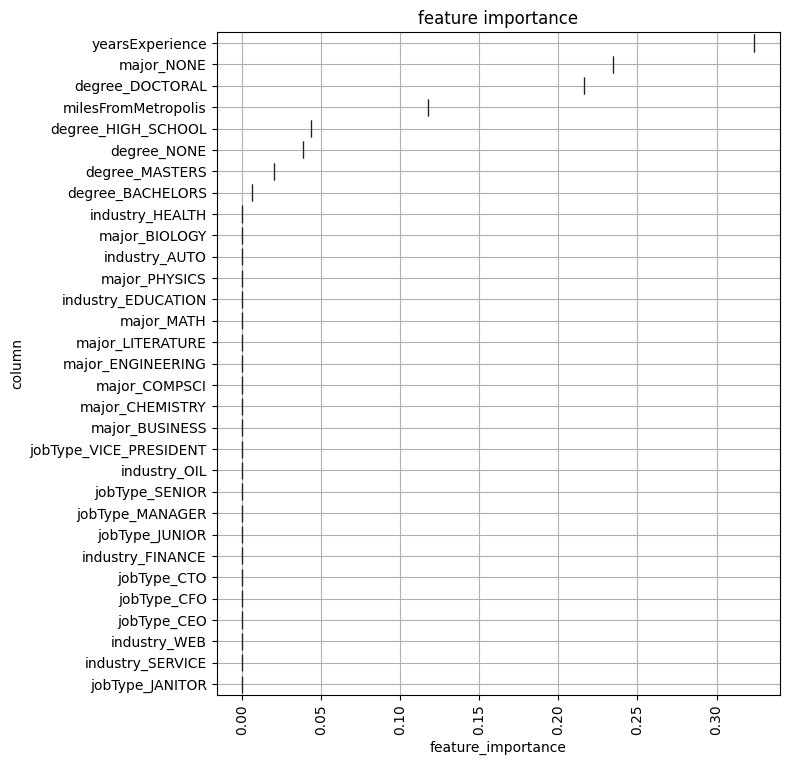

In [ ]:
%%time
rf=RandomForestRegressor(**{'n_estimators': 16, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True})
# fit the model to the data
rf.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
print_score(rf)
fig,ax=visualize_importance(rf.feature_importances_,X_train.iloc[1:10000])

# Gradiant Boosting Regressor


RMSE-train:19.549160410858025
RMSE:19.53159807599967
Score-Train:0.7420058764626605
Score-Test:0.7441386570072005
MedAE-Train:13.617503813242493
MedAE-Test:13.608865500908522
MAE-Train:15.757023222049583
MAE-Test:15.747721246926961

CPU times: user 13.5 s, sys: 589 ms, total: 14.1 s
Wall time: 15.9 s


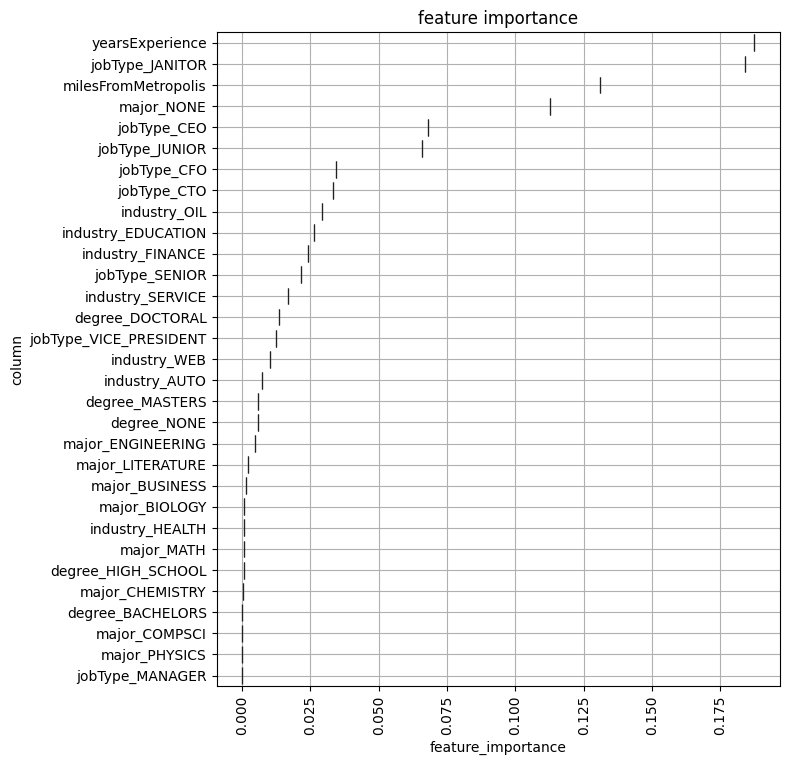

In [ ]:
%%time
# import GradiantBoostinRegressor
from sklearn.ensemble import GradientBoostingRegressor
# initiate the model
GBR=GradientBoostingRegressor(**{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 30, 'learning_rate': 0.1})
# fit the model to the data
GBR.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
print_score(GBR)
fig,ax=visualize_importance(GBR.feature_importances_,X_train.iloc[1:10000])

# Decision tree regressor


RMSE-train:35.67518367398424
RMSE:35.750694221771816
Score-Train:0.14081630046429605
Score-Test:0.14276858805197612
MedAE-Train:24.537728026533998
MedAE-Test:24.78895994614608
MAE-Train:28.712848326126743
MAE-Test:28.76033841145651

CPU times: user 1.2 s, sys: 426 ms, total: 1.62 s
Wall time: 1.62 s


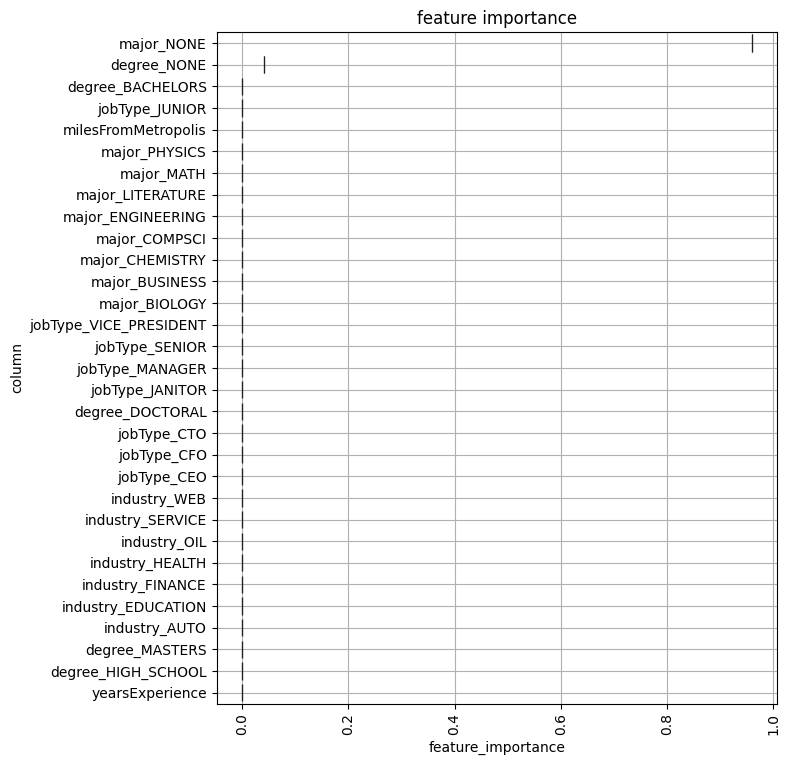

In [ ]:
%%time
# import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
# initiate the model
DTR=DecisionTreeRegressor(**{'splitter': 'random', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 0.2, 'max_features': None, 'max_depth': 5})
# fit the model to the data
DTR.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
print_score(DTR)
fig,ax=visualize_importance(DTR.feature_importances_,X_train.iloc[1:10000])

# XGBoost Regressor


RMSE-train:19.33581838326505
RMSE:19.300363911518104
Score-Train:0.7476061840197534
Score-Test:0.7501610688625495
MedAE-Train:13.593360900878906
MedAE-Test:13.567596435546875
MAE-Train:15.64499655400607
MAE-Test:15.623490787664993

CPU times: user 9.12 s, sys: 70 ms, total: 9.19 s
Wall time: 11.2 s


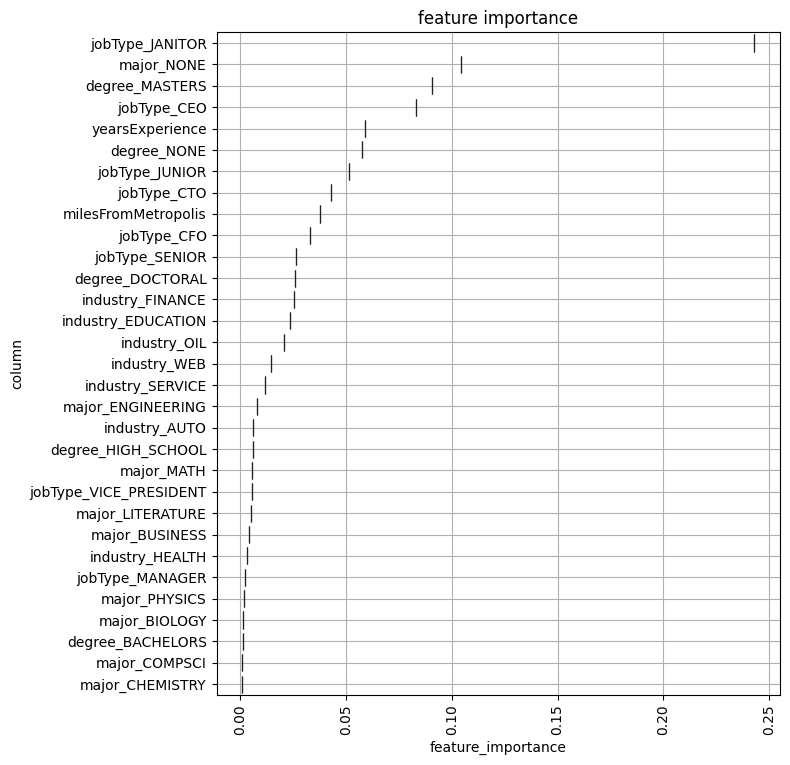

In [ ]:
%%time
xgbr=XGBRegressor(**{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.4})
xgbr.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])
print_score(xgbr)
fig,ax=visualize_importance(xgbr.feature_importances_,X_train.iloc[1:10000])

# comparing the metrics for tuned models


In [ ]:
models=[rf,GBR,DTR,xgbr]
names=['randomforest','gradiantboosting','decisiontree','xgboost']
comp_model_train,comp_model_test=compare_models(models,names,X_train,X_test,Y_train,Y_test)

In [ ]:
print("Metrics on test data")
comp_model_test

Metrics on test data


,Metrics,randomforest,gradiantboosting,decisiontree,xgboost
0,rmse,35.009136,19.531598,35.750694,19.300364
1,MedAE,24.135815,13.608866,24.788960,13.567596
2,MAE,-23.075431,0.630242,-4.680916,0.643393
3,R-squared,-23.075431,0.630242,-4.680916,0.643393


In [ ]:
print("Metrics on train data")
comp_model_train

Metrics on train data


,Metrics,randomforest,gradiantboosting,decisiontree,xgboost
0,rmse,34.912173,19.549160,35.675184,19.335818
1,MedAE,24.135815,13.617504,24.537728,13.593361
2,MAE,-23.036596,0.628920,-4.662864,0.641161
3,R-squared,-23.075431,0.630242,-4.680916,0.643393


# working with the test dataset provided

In [ ]:
# test data
test_X=test_data
test_X

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JUNIOR,NONE,NONE,AUTO,20,47
2,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3
999996,MANAGER,NONE,NONE,HEALTH,20,67
999997,JANITOR,NONE,NONE,OIL,1,91
999998,CTO,DOCTORAL,MATH,OIL,14,63


In [ ]:
#Passing test data for scaling
col_test=['yearsExperience','milesFromMetropolis']
test_X=scale_data(test_X,col_test)

In [ ]:
# passing test dataset for one hot encoding process
encoder=OneHotEncoder()
test_drop=test_X.drop(['jobType','degree','major','industry'],axis=1)
test_X=encoder.fit_transform(test_X.drop(['yearsExperience','milesFromMetropolis'],axis=1))
test_X = test_X.join(test_drop['yearsExperience'])
test_X = test_X.join(test_drop['milesFromMetropolis'])
test_X.head()

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.916667,0.737374
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.833333,0.474747
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.708333,0.090909
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.583333,0.969697
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.416667,0.444444


In [ ]:
# now perform the prediction on the test dataset
y_predicted=GBR.predict(test_X)
y_predicted

array([114.3509419 ,  92.90948005, 170.42750949, ...,  60.6478571 ,
       163.65251704, 119.74504863])

In [ ]:
# create a dataframe for predicted result
predictions=pd.DataFrame(y_predicted)


In [ ]:
# predicted values in Dataframe
predictions

,0
0,114.350942
1,92.909480
2,170.427509
3,109.695817
4,117.509944
...,...
999995,167.694953
999996,111.776920
999997,60.647857
999998,163.652517


# **Business problem**

In [ ]:
# why employees leaving due to some reason and we need to know the reason
# It is salary
# we take sample provided by manager so that we can explain him the difference between
# salary the person should be getting and the salary the person is getting
sample=train_data.sample(1000)
sample

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
447202,CFO,BACHELORS,ENGINEERING,AUTO,0.875000,0.676768,171
552429,CEO,DOCTORAL,CHEMISTRY,OIL,0.666667,0.272727,154
402452,SENIOR,MASTERS,BIOLOGY,EDUCATION,0.250000,0.565657,94
926232,VICE_PRESIDENT,HIGH_SCHOOL,NONE,AUTO,0.000000,0.101010,78
727216,JANITOR,NONE,NONE,AUTO,0.375000,0.050505,57
...,...,...,...,...,...,...,...
476923,CEO,DOCTORAL,CHEMISTRY,SERVICE,0.291667,0.727273,112
260920,CEO,NONE,NONE,EDUCATION,0.583333,0.979798,113
254032,MANAGER,BACHELORS,CHEMISTRY,SERVICE,0.833333,0.252525,133
693775,JUNIOR,DOCTORAL,PHYSICS,WEB,0.750000,0.252525,162


In [ ]:
# passing test data for scalling
col_test=['yearsExperience','milesFromMetropolis']
sample_X=scale_data(X_sample,col_test)
sample_X

,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
727216,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391304,0.040816
911350,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.217391,0.948980
7210,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.956522,1.000000
613055,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304348,1.000000
381267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.260870,0.663265
666061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217391,0.122449
592490,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.043478,0.693878
276911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.565217,0.714286


In [ ]:
#categorical variable for sample
train_cat=sample.iloc[:,0:4]
# encoding the samples
encoder=OneHotEncoder()
train_X=encoder.fit_transform(train_cat)

# processing the sample data
train= train_X.join(sample.iloc[:,4:])

# taking those whose sample is very less i.e the reason for employee resigning
sample=train[train['salary'] < 60]
sample

#Preparing the x and y values
X_sample=sample.drop(['salary'],axis=1)
Y_sample=sample['salary']



,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,jobType_VICE_PRESIDENT,degree_BACHELORS,degree_DOCTORAL,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
727216,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.391304,0.040816
911350,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.217391,0.948980
7210,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.956522,1.000000
613055,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.304348,1.000000
381267,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.163265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536620,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.260870,0.663265
666061,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217391,0.122449
592490,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.043478,0.693878
276911,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.565217,0.714286


In [ ]:
# prediction value
predicted_out=GBR.predict(sample_X)
predicted_out

array([81.07660742, 37.51969463, 67.53442641, 36.34449651, 45.59952257,
       66.07292121, 59.82850078, 73.83684793, 40.9155182 , 66.95105724,
       62.0145252 , 63.8664737 , 38.30388708, 49.65532999, 50.34496881,
       57.58065234, 54.76866884, 44.5201107 , 55.7770717 , 38.39349047,
       62.72346721, 61.41508019, 64.14551834, 56.66196504, 54.46058429,
       39.52157203, 54.71384307, 61.14471436, 65.97396107, 46.77259802,
       63.30629757, 74.019984  , 41.30838895, 57.62471151, 56.87306171,
       46.10960035, 38.61814388, 52.72608478, 59.31860904, 47.08785217,
       54.85207268, 44.89032338, 73.01958034, 38.81781048, 38.05468077,
       63.11310143, 38.1397062 , 70.64340218, 52.12634194, 75.0446078 ,
       72.36025033, 54.18556974, 84.10652296, 46.65439742, 45.85041065,
       45.18293981, 56.59806767, 58.57633316, 49.64921388, 76.70637539,
       64.09158337, 65.94093565, 60.94990259, 79.68014569, 71.94829143,
       46.92382313, 53.79890855, 45.25895485, 68.01448775, 36.08

In [ ]:
Y_sample # real value

,salary
727216,57
911350,34
7210,53
613055,39
381267,36
...,...
536620,46
666061,59
592490,46
276911,46


# as we see the difference in  value

Here we see defference between real salary and and predicted salary which may be a probable reason to leave the company.

## major employees of company are not happy with salary given by company even if they have the required skills to do the jobs as compared to other competitors.

## The employee living in the metro cities are satasified with the salary  but employee living far away from the city are not getting satisfactory salary which is most probable reason for leaving the company.

# **Solution**

## 1. Either increase the salary of thes employee(if they have required degree and major)

## 2. Provide accomodation to people living the places far from city so that are satisfied.

## 3. provide appraisal or some token of appreciation to such employee's

# all necessary step make the employee more loyal to company.